In [35]:
print("fuzzy-diabetes-diagnosis")
print("Jehezkiel Beny Brian\t\t103012300241")
print("Ridwan Ramdhani\t\t\t103012300191")
print("Fairuztsani Kemal Setiawan\t103012300048")

fuzzy-diabetes-diagnosis
Jehezkiel Beny Brian		103012300241
Ridwan Ramdhani			103012300191
Fairuztsani Kemal Setiawan	103012300048


# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Read CSV

In [37]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Statistik Deskriptif Awal:**

- Jumlah sampel: 768
- Fitur numerik: 8 (Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age, Pregnancies)
- Target biner: 0 (non-diabetes), 1 (diabetes)
- Beberapa fitur memiliki nilai 0 yang tidak valid secara medis dan telah ditangani dengan imputasi menggunakan median, berdasarkan hasil analisis distribusi.

# 📊 EDA (Exploratory Data Analysis)

### Deskripsi Data: Ukuran, Fitur, dan Target

In [38]:
rows, cols = data.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

Jumlah baris: 918
Jumlah kolom: 12


In [39]:
target = "HeartDisease"
data[target].head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [41]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [42]:
data.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

### Cek Missing Values

In [43]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Distribusi Fitur

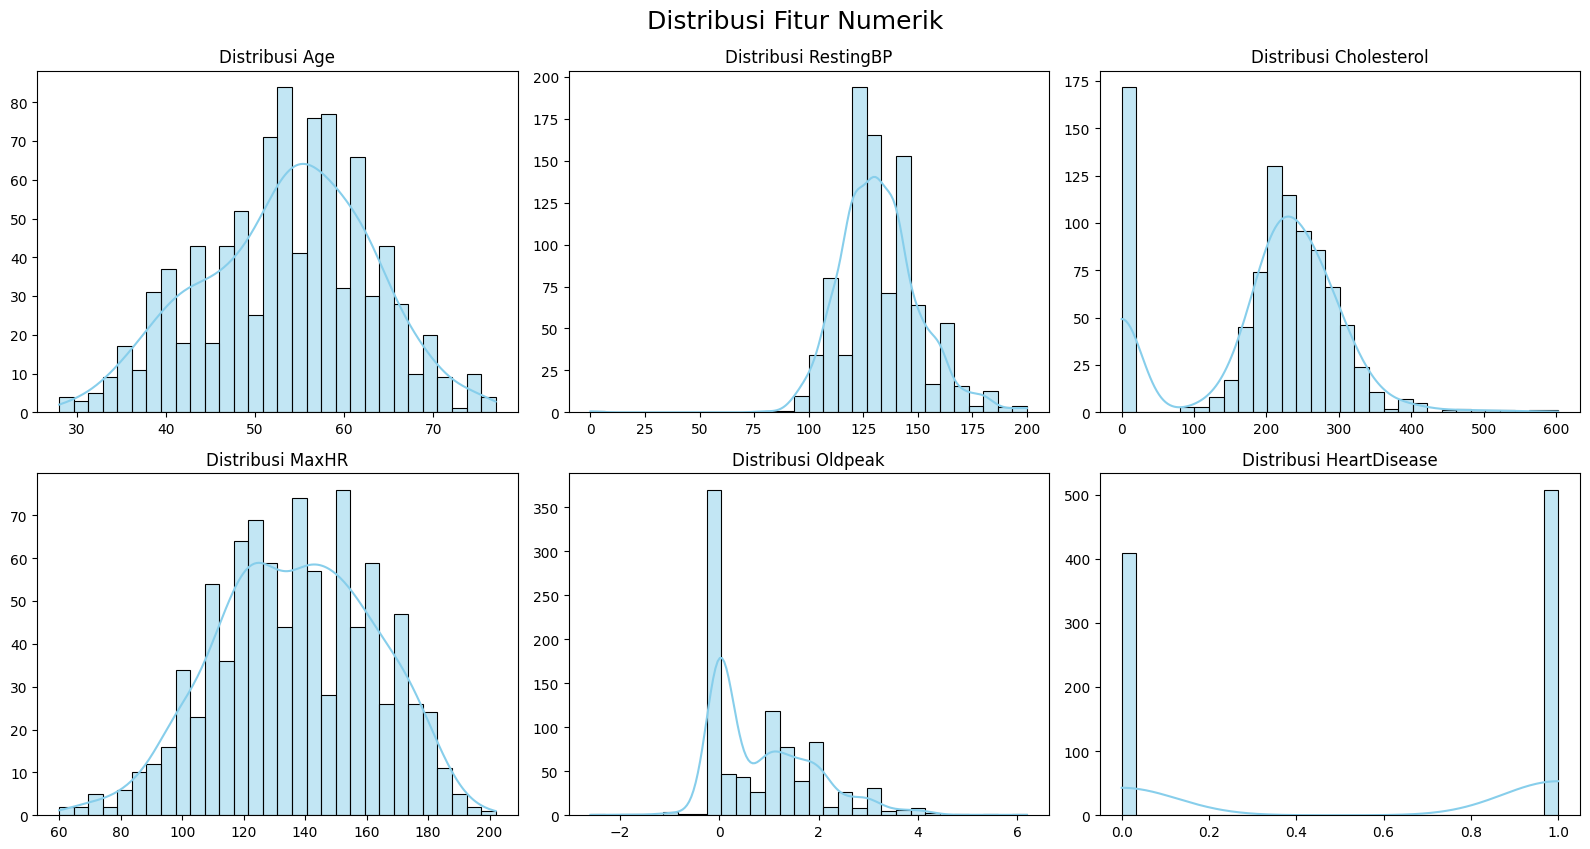

In [44]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
       'HeartDisease']

plt.figure(figsize=(16, 12))  # Ukuran canvas

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3 baris x 3 kolom subplot
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerik", fontsize=18, y=1.02)
plt.show()

### Distribusi Target

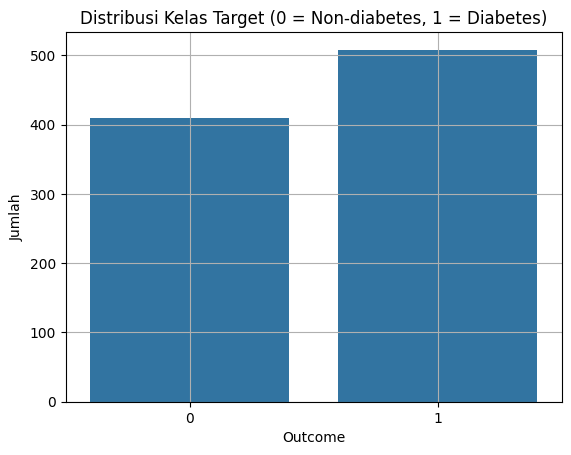

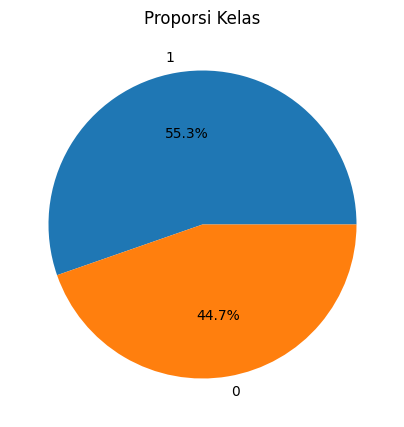

In [45]:
sns.countplot(x=target, data=data)
plt.title("Distribusi Kelas Target (0 = Non-diabetes, 1 = Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

# Proporsi
data[target].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Proporsi Kelas')
plt.ylabel('')
plt.show()


### Korelasi Antar Fitur

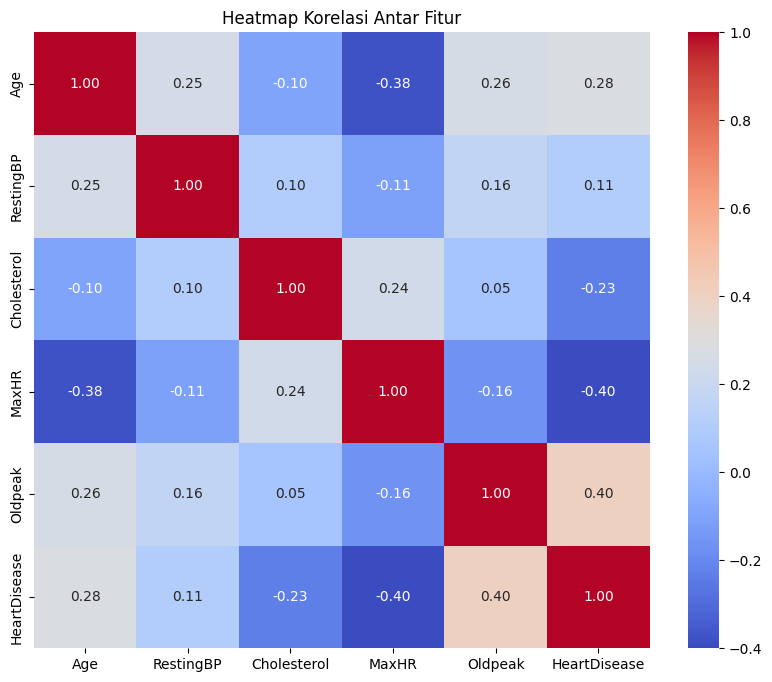

In [46]:
plt.figure(figsize=(10, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

### Analisis Fitur terhadap Target

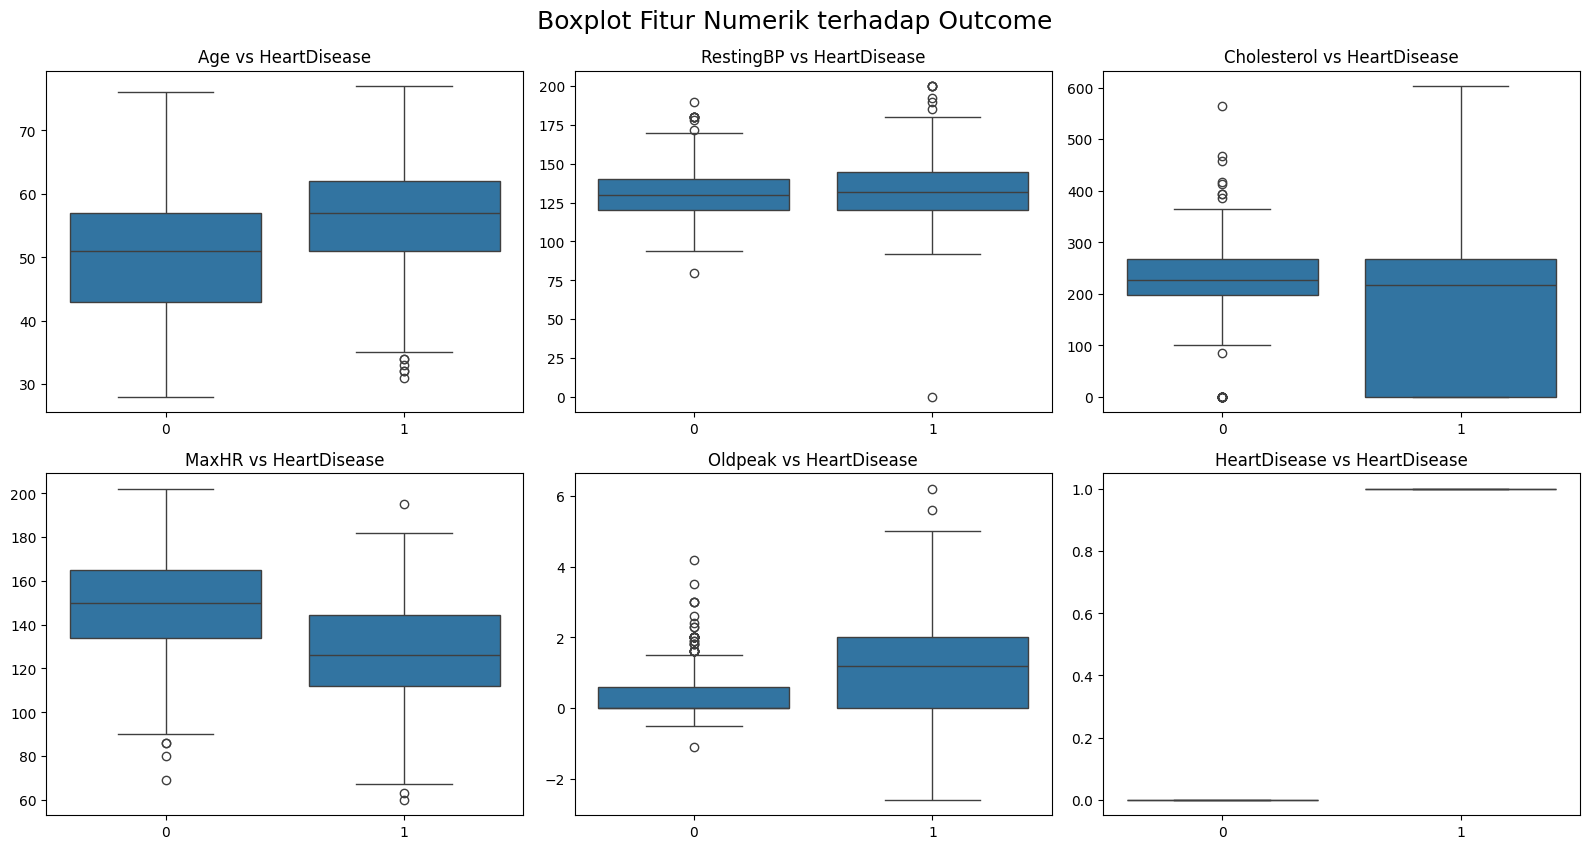

In [47]:
plt.figure(figsize=(16, 12))  # Ukuran canvas

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Grid subplot 3 baris x 3 kolom
    sns.boxplot(x=target, y=col, data=data)
    plt.title(f'{col} vs {target}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Boxplot Fitur Numerik terhadap Outcome", fontsize=18, y=1.02)
plt.show()

# 🧹 Preprocessing Data

In [48]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Handling Missing Values

In [49]:
len(data)

918

In [50]:
data.isna().sum() / len(data)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [51]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

## Handling Invalid Values

In [52]:
def preprocess_heart_disease(df):
    # Age
    # Alasan: Usia < 18 biasanya bukan target penyakit jantung dewasa, bisa noise/outlier.
    initial_count = len(df)
    df = df[df['Age'] >= 18]
    print(f"Drop Age < 18: {initial_count - len(df)} rows removed.")

    # RestingBP
    # Alasan: Tekanan darah <= 0 gak mungkin secara medis, artinya data error.
    invalid_bp = df[df['RestingBP'] <= 0].shape[0]
    df.loc[df['RestingBP'] <= 0, 'RestingBP'] = np.nan  # ganti dengan NaN untuk imputasi nanti
    print(f"RestingBP <= 0: {invalid_bp} values set to NaN.")

    # Cholesterol
    # Alasan: Kolesterol 0 gak mungkin secara biologis, biasanya data hilang/keliru.
    invalid_chol = df[df['Cholesterol'] == 0].shape[0]
    df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.nan
    print(f"Cholesterol == 0: {invalid_chol} values set to NaN.")

    # FastingBS
    # Alasan: FastingBS harus binary 0 atau 1, nilai lain invalid.
    invalid_fbs = df[~df['FastingBS'].isin([0,1])].shape[0]
    df = df[df['FastingBS'].isin([0,1])]
    print(f"FastingBS invalid (not 0/1): {invalid_fbs} rows removed.")

    # MaxHR
    # Alasan: Biarkan dulu, tapi bisa dicek visual jika mau.
    # Opsional: cek outlier
    print(f"MaxHR range: min={df['MaxHR'].min()}, max={df['MaxHR'].max()}")

    # Oldpeak
    # Alasan: 0 valid, nilai tinggi bisa tetap valid, tidak dihapus.
    print(f"Oldpeak range: min={df['Oldpeak'].min()}, max={df['Oldpeak'].max()}")

    # HeartDisease (target)
    # Alasan: Target harus binary 0 atau 1, selain itu data tidak valid.
    invalid_target = df[~df['HeartDisease'].isin([0,1])].shape[0]
    df = df[df['HeartDisease'].isin([0,1])]
    print(f"HeartDisease invalid (not 0/1): {invalid_target} rows removed.")

    # # Optional: Imputasi missing values (RestingBP, Cholesterol)
    # # Bisa ganti NaN dengan median supaya data tetap lengkap
    # df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
    # df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)
    # print("Imputasi missing RestingBP dan Cholesterol dengan median.")

    return df

In [53]:
data = preprocess_heart_disease(data)

Drop Age < 18: 0 rows removed.
RestingBP <= 0: 1 values set to NaN.
Cholesterol == 0: 172 values set to NaN.
FastingBS invalid (not 0/1): 0 rows removed.
MaxHR range: min=60, max=202
Oldpeak range: min=-2.6, max=6.2
HeartDisease invalid (not 0/1): 0 rows removed.


Analisis distribusi dilakukan menggunakan visualisasi histogram dan uji Shapiro-Wilk. Semua fitur yang invalid menunjukkan distribusi yang tidak normal, sehingga median dipilih sebagai metode imputasi yang lebih robust terhadap outlier.

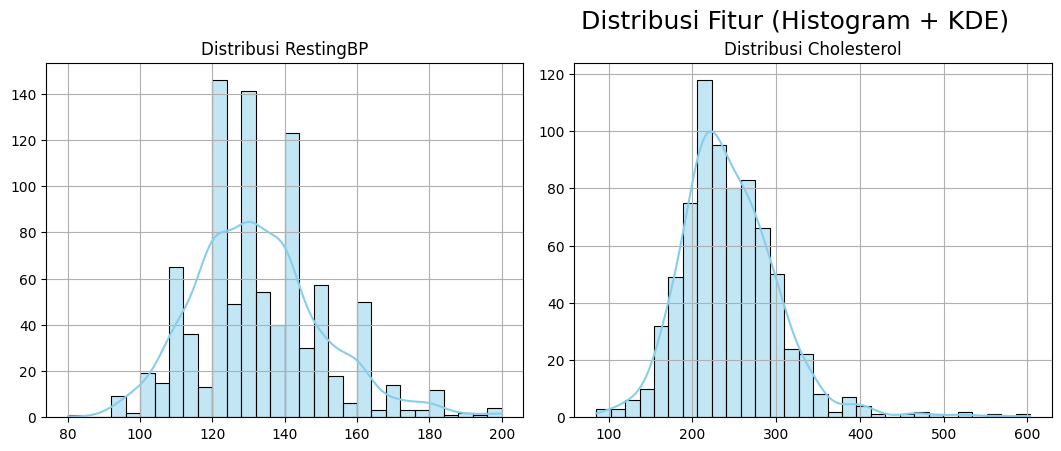

In [54]:
invalid_cols = ['RestingBP', 'Cholesterol']

# Subplot
plt.figure(figsize=(16, 8))
for i, col in enumerate(invalid_cols, 1):
    plt.subplot(2, 3, i)  # 2 baris x 3 kolom (1 slot kosong)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribusi Fitur (Histogram + KDE)", fontsize=18, y=1.02)
plt.show()

In [55]:
print("🔍 Hasil Uji Normalitas (Shapiro-Wilk):\n")
for col in invalid_cols:
    stat, p = shapiro(data[col])
    print(f"{col}: p-value = {p:.4f} → ", end="")
    if p > 0.05:
        print("Distribusi kemungkinan **normal**")
    else:
        print("Distribusi kemungkinan **TIDAK normal**")

🔍 Hasil Uji Normalitas (Shapiro-Wilk):

RestingBP: p-value = 1.0000 → Distribusi kemungkinan **normal**
Cholesterol: p-value = 1.0000 → Distribusi kemungkinan **normal**


Beberapa fitur dalam dataset mengandung nilai 0 yang tidak valid secara medis, seperti `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, dan `BMI`. Nilai 0 pada kolom-kolom tersebut diganti dengan `NaN` dan kemudian diimputasi menggunakan nilai median dari masing-masing kolom.

Pendekatan ini dipilih karena median lebih tahan terhadap outlier dan cocok untuk distribusi yang tidak normal. Kolom seperti `Insulin` dan `SkinThickness` memiliki proporsi missing value yang tinggi, namun tetap dipertahankan dengan imputasi untuk menjaga kelengkapan fitur dalam sistem fuzzy.

In [56]:
cols_to_fix = invalid_cols.copy()

for col in cols_to_fix:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    print(f"{col}: imputasi median = {median_val}")

RestingBP: imputasi median = 130.0
Cholesterol: imputasi median = 237.0


## Handling Outliers

Karena dataset berisi data klinis yang rentan memiliki nilai ekstrim yang valid secara medis, kami memilih tidak melakukan penghapusan atau penanganan outlier secara khusus. Hal ini dikarenakan nilai-nilai ekstrim tersebut berpotensi mengandung informasi penting terkait diagnosis diabetes dan sistem fuzzy yang kami gunakan dapat menangani nilai-nilai tersebut melalui membership function yang fleksibel


... for now

## Train Test Split

In [64]:
X = data.drop(columns=[target])[numerical_cols[:-1]]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # stratify biar distribusi kelas tetep balance

In [66]:
X_train.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.848774,132.874659,244.880109,136.377384,0.865123
std,9.440574,18.080330,54.275527,25.832297,1.056964
min,29.000000,92.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,215.000000,119.000000,0.000000
50%,55.000000,130.000000,237.000000,138.000000,0.500000
75%,61.000000,141.000000,269.750000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,5.600000


In [67]:
X_test.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,184.000000,184.000000,184.000000,184.000000,184.000000
mean,52.163043,131.195652,236.521739,138.532609,0.976087
std,9.304535,17.610069,49.336245,23.908501,1.102542
min,28.000000,80.000000,110.000000,80.000000,-0.100000
25%,45.750000,120.000000,207.000000,121.750000,0.000000
50%,52.000000,130.000000,237.000000,139.000000,0.650000
75%,58.000000,140.000000,254.500000,155.250000,1.725000
max,75.000000,192.000000,518.000000,195.000000,6.200000


## Normalisasi

In [68]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

In [70]:
# Balikin jadi dataframe lagi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [71]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

X_train shape: (734, 5)
X_test shape: (184, 5)


In [72]:
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}\n")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

y_train distribution:
HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64

y_test distribution:
HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [73]:
X_train_scaled.sample(n=5, random_state=42)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
118,0.125000,0.259259,0.144788,0.880282,0.317073
736,0.520833,0.277778,0.388031,0.394366,0.707317
381,0.437500,0.212963,0.293436,0.422535,0.378049
158,0.312500,0.351852,0.395753,0.281690,0.560976
125,0.520833,0.259259,0.310811,0.352113,0.317073


# 🧠 Implementasi Model Fuzzy System

## Definisikan Input & Output Fuzzy

In [59]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# DEFINISI VARIABLE INPUT FUZZY

# Glucose
glucose_fuzzy = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'Glucose')

# BMI
bmi_fuzzy = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'BMI')

# Age
age_fuzzy = ctrl.Antecedent(np.arange(0, 1.0, 0.01), 'Age')

# DEFINSI OUTPUT FUZZY 
diabetes_fuzzy = ctrl.Consequent(np.arange(0, 1.0, 0.01), 'Diabetes')


## Membuat Membership Function

C:\Users\tsfai\Anaconda3\envs\env3.11\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x600 with 0 Axes>

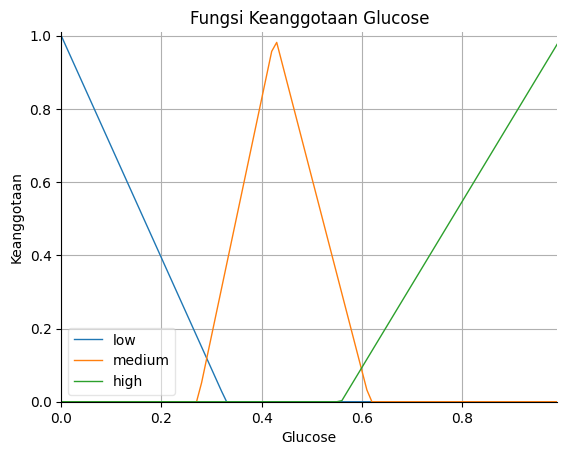

<Figure size 1000x600 with 0 Axes>

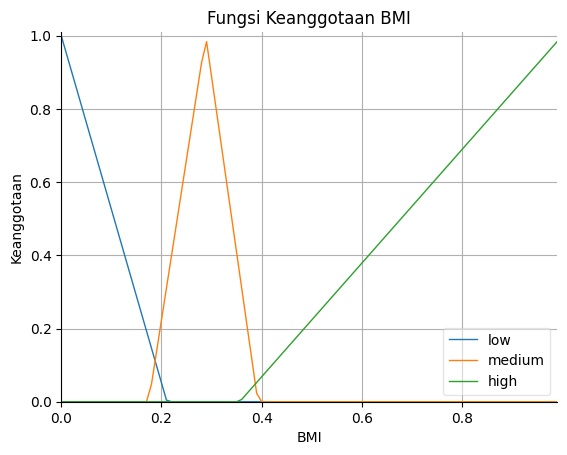

<Figure size 1000x600 with 0 Axes>

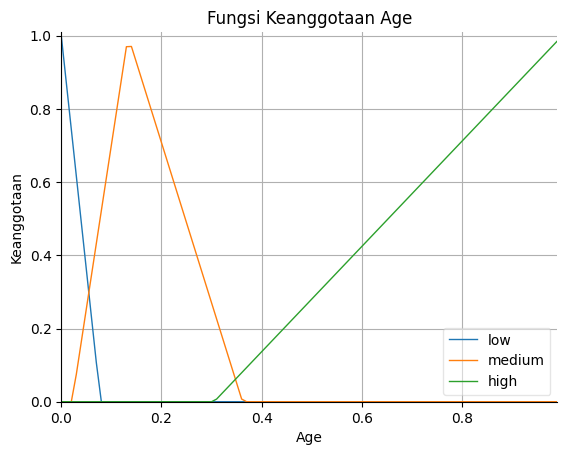

In [60]:
# Ambil nilai statistik dari data yang sudah dinormalisasi
def get_fuzzy_ranges(col):
    q1 = X_train_scaled[col].quantile(0.25)
    median = X_train_scaled[col].median()
    q3 = X_train_scaled[col].quantile(0.75)
    min_val = X_train_scaled[col].min()
    max_val = X_train_scaled[col].max()
    return min_val, q1, median, q3, max_val

# Offset
def calculate_offset(q1, q3):
    iqr = q3 - q1
    return 0.1 * iqr

# Glucose
glu_min, glu_q1, glu_med, glu_q3, glu_max = get_fuzzy_ranges('Glucose')
offset = calculate_offset(glu_q1, glu_q3)
glucose_fuzzy['low'] = fuzz.trimf(glucose_fuzzy.universe, [glu_min, glu_min, glu_q1 + offset])
glucose_fuzzy['medium'] = fuzz.trimf(glucose_fuzzy.universe, [glu_q1 - offset, glu_med, glu_q3 + offset])
glucose_fuzzy['high'] = fuzz.trimf(glucose_fuzzy.universe, [glu_q3 - offset, glu_max, glu_max])

# BMI
bmi_min, bmi_q1, bmi_med, bmi_q3, bmi_max = get_fuzzy_ranges('BMI')
offset = calculate_offset(bmi_q1, bmi_q3)
bmi_fuzzy['low'] = fuzz.trimf(bmi_fuzzy.universe, [bmi_min, bmi_min, bmi_q1 + offset])
bmi_fuzzy['medium'] = fuzz.trimf(bmi_fuzzy.universe, [bmi_q1 - offset, bmi_med, bmi_q3 + offset])
bmi_fuzzy['high'] = fuzz.trimf(bmi_fuzzy.universe, [bmi_q3 - offset, bmi_max, bmi_max])

# Age
age_min, age_q1, age_med, age_q3, age_max = get_fuzzy_ranges('Age')
offset = calculate_offset(age_q1, age_q3)
age_fuzzy['low'] = fuzz.trimf(age_fuzzy.universe, [age_min, age_min, age_q1 + offset])
age_fuzzy['medium'] = fuzz.trimf(age_fuzzy.universe, [age_q1 - offset, age_med, age_q3 + offset])
age_fuzzy['high'] = fuzz.trimf(age_fuzzy.universe, [age_q3 - offset, age_max, age_max])

# Definisi Fungsi Keanggotaan untuk Output
diabetes_fuzzy['non_diabetes'] = fuzz.trimf(diabetes_fuzzy.universe, [0, 0, 0.5])
diabetes_fuzzy['diabetes'] = fuzz.trimf(diabetes_fuzzy.universe, [0.5, 1, 1])


# Menampilkan Fungsi Keanggotaan
def plot_fuzzy_sets(antecedent, title):
    plt.figure(figsize=(10, 6))
    antecedent.view()
    plt.title(title)
    plt.xlabel(antecedent.label)
    plt.ylabel('Keanggotaan')
    plt.grid()
    plt.show()

plot_fuzzy_sets(glucose_fuzzy, 'Fungsi Keanggotaan Glucose')
plot_fuzzy_sets(bmi_fuzzy, 'Fungsi Keanggotaan BMI')
plot_fuzzy_sets(age_fuzzy, 'Fungsi Keanggotaan Age')


## Menentukkan Fuzzy Rules

In [61]:
# ===== RULES UNTUK DIAGNOSIS "DIABETES" =====

# Kondisi kuat diabetes
rule1  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['high']   & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule2  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['high']   & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule3  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule4  = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['high']   & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule5  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['medium'] & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule6  = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['high']   & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule7  = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule8  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule9  = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['high']   & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule10 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])

# ===== RULES UNTUK KONDISI "NON-DIABETES" =====

rule11 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['low']    & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule12 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['medium'] & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule13 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule14 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule15 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['medium'] & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule16 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule17 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['non_diabetes'])
rule18 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['high']   & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule19 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['non_diabetes'])
rule20 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['high']   & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])

# ===== RULES UNTUK KONDISI "BORDERLINE" =====

rule21 = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['low']    & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule22 = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['medium'] & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule23 = ctrl.Rule(glucose_fuzzy['high']   & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['diabetes'])
rule24 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['high']   & age_fuzzy['low'],    diabetes_fuzzy['diabetes'])
rule25 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule26 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['low'],    diabetes_fuzzy['non_diabetes'])
rule27 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['high']   & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])
rule28 = ctrl.Rule(glucose_fuzzy['low']    & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['non_diabetes'])
rule29 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['low']    & age_fuzzy['medium'], diabetes_fuzzy['non_diabetes'])
rule30 = ctrl.Rule(glucose_fuzzy['medium'] & bmi_fuzzy['medium'] & age_fuzzy['high'],   diabetes_fuzzy['diabetes'])


## Implementasi Mamdani

In [62]:
# penggabungan semua rule
diabetes_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30,
])

# Pembuatan objek untuk menyimpan hasil prediksi
diabetes_simulation = ctrl.ControlSystemSimulation(diabetes_ctrl)


In [63]:
from typing import List
from sklearn.metrics import accuracy_score, classification_report

def fuzzy_predict(X_scaled, fuzzy_simulation, threshold: float = 0.5) -> List[int]:
    predictions = []

    for i, row in X_scaled.iterrows():
        try:
            # Set input fuzzy
            fuzzy_simulation.input['Glucose'] = row['Glucose']
            fuzzy_simulation.input['BMI'] = row['BMI']
            fuzzy_simulation.input['Age'] = row['Age']

            # Hitung hasil
            fuzzy_simulation.compute()

            # Ambil hasil output
            output = fuzzy_simulation.output.get('Diabetes', None)

            # Ambil prediksi
            pred = 1 if output is not None and output >= threshold else 0

        except Exception as e:
            print(f"[Error] Indeks {i} - {e}")
            pred = 0  # Default jika error

        predictions.append(pred)

    return predictions

# Gunakan fungsi untuk memprediksi
y_pred_fuzzy = fuzzy_predict(X_test_scaled, diabetes_simulation, 0.55)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred_fuzzy))
print(classification_report(y_test, y_pred_fuzzy))


Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       100
           1       0.55      0.85      0.67        54

    accuracy                           0.70       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.77      0.70      0.71       154



In [64]:
### Implementasi Sugeno

# Sugeno sederhana: output berupa weighted average dari input (bobot bisa diatur)
def sugeno_predict(X_scaled, weights=None, threshold=0.5):
    # weights: [Glucose, BMI, Age]
    weighted_sum = (
        X_scaled['Glucose'] * weights[0] +
        X_scaled['BMI'] * weights[1] +
        X_scaled['Age'] * weights[2]
    )
    # Normalisasi jika perlu (pastikan sum(weights) == 1)
    preds = (weighted_sum >= threshold).astype(int)
    return preds

# Prediksi dengan Sugeno
y_pred_sugeno = sugeno_predict(X_test_scaled, weights=[0.5, 0.3, 0.2], threshold=0.4)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred_sugeno))
print(classification_report(y_test, y_pred_sugeno))


Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



# 📈 Evaluasi Model

## Evaluasi dengan Metrik

(accuracy, presisi, recall, F1-score, confusion matrix)

In [65]:
# Code here

# Analisis hasil

(misalnya: Mamdani lebih interpretatif, Sugeno lebih presisi, dst.)

In [66]:
# Code here

# 📝 Kesimpulan dan Analisis

Buatin kesimpulkan apa yang dipelajari, mana metode yang lebih baik, dan kenapanya

In [67]:
# Code here